## Pruning and Visualizing sklearn DecisionTreeClassifiers

This post serves two purposes:
1. It illustrates and compares three different methods of visualizing `DecisionTreeClassifiers` from sklearn.
2. It shows a simple quick way of manually pruning selected nodes from the tree.

In [14]:
from dtreeviz.trees import *
from IPython.display import SVG  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.datasets import load_iris
import copy

#for plotting
import matplotlib.pyplot as plt
from sklearn import tree

import graphviz 


### dtreeviz
We are using the wonderful tree visualization library `dtreeviz` :
https://github.com/parrt/dtreeviz

In [11]:
def ViewSVG(viz):
    from IPython.display import SVG  
    fname= viz.save_svg() 
    return SVG(fname)


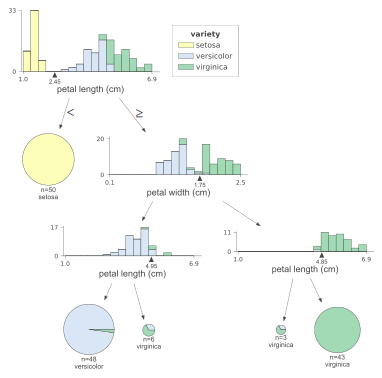

In [33]:
clf1 = tree.DecisionTreeClassifier(max_depth=3)  # limit depth of tree
iris = load_iris()
clf1.fit(iris.data, iris.target)

dtreeviz(clf1, 
   iris.data, 
   iris.target,
   target_name='variety',
  feature_names=iris.feature_names, 
   class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
  )  
            


We now selectively prune the last two children which belong to parent node #6:

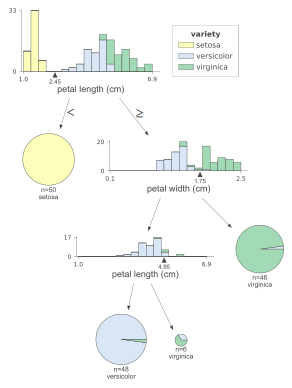

In [15]:
clf2 = copy.deepcopy(clf1)
#prune the tree
clf2.tree_.children_left[6] = -1
clf2.tree_.children_right[6]  = -1

viz2 = dtreeviz(clf2, 
               iris.data, 
               iris.target,
               target_name='variety',
              feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
ViewSVG(viz2)            


### Using `plot_tree` also works:

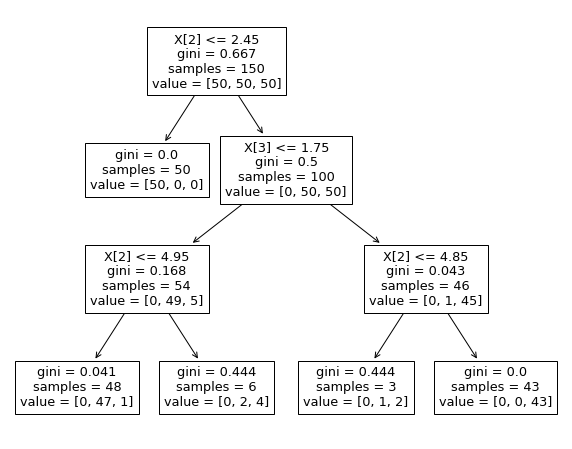

In [21]:
plt.rcParams["figure.figsize"]=10,8

tmp=tree.plot_tree(clf1) 



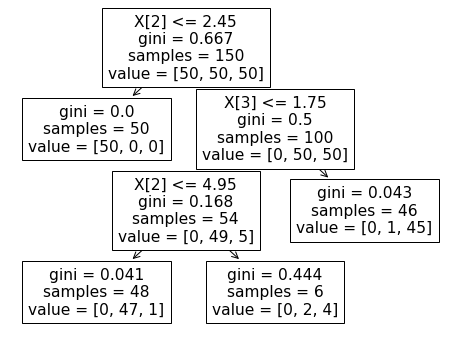

In [31]:
plt.rcParams["figure.figsize"]=8,6

tmp=tree.plot_tree(clf2) 

### Graphviz

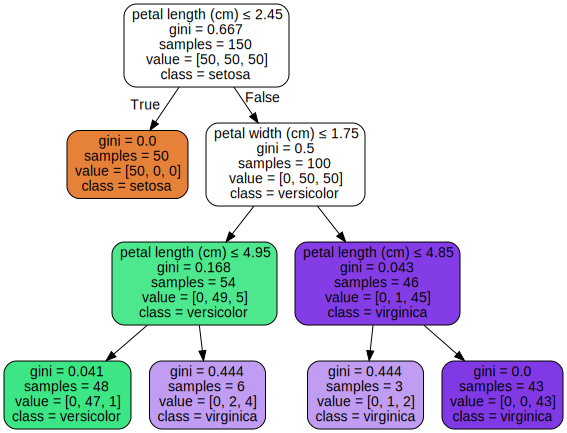

In [28]:
plt.rcParams["figure.figsize"]=5,5
dot_data = tree.export_graphviz(clf1, out_file=None, 
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)
graph = graphviz.Source(dot_data) 
graph

In [43]:

#iris.data
#iris.feature_names

array([[0.        , 0.33333333, 0.66666667],
       [0.        , 0.33333333, 0.66666667]])

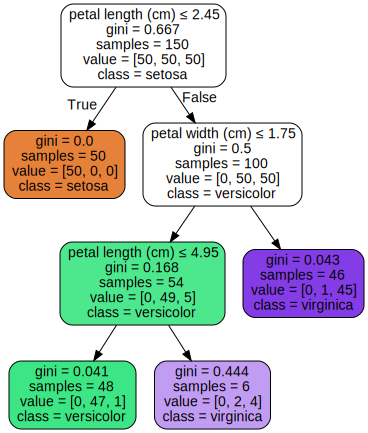

In [29]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)
graph = graphviz.Source(dot_data) 
graph

In [46]:
print(clf1.predict_proba([[0,0,3,2],[0,0,3,2]])[0])
print(clf2.predict_proba([[0,0,3,2],[0,0,3,2]])[0])
print([0,1/46,45/46])

[0.         0.33333333 0.66666667]
[0.         0.02173913 0.97826087]
[0, 0.021739130434782608, 0.9782608695652174]
